<a href="https://colab.research.google.com/github/Yamito548/Proyecto-Bank-marketing/blob/main/Act_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El dataset utilizado fue sacado de [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing). Es sobre campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo. Tiene 16 características y 45211 filas.

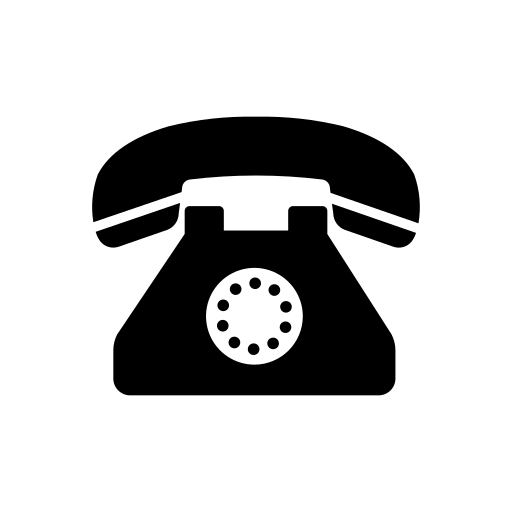

# Librerías

In [1]:
import pandas as pd
import numpy as np

In [2]:
bank_full = "https://raw.githubusercontent.com/Yamito548/Proyecto-Bank-marketing/main/bank-full.csv"

data = pd.read_csv(bank_full ,sep=";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Elegí este dataset frente el otro simplemente porque me pareció más curioso y interesante de utilizar. Me parece que es un caso que podría encontrar en mi vida laboral y me apeteció darle un intento.

Como se puede ver, es un dataset grandecito, con pocas columnas pero muchas filas.

Seguimos viendo los datos, esto es importante para poder entender mejor el dataset antes de empezar a trabajar con el mismo.

In [3]:
#Seguimos viendo los datos
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# Manipulamos los datos

In [4]:
#En primer lugar comprobamos si hay missing values en algunas de las columnas
missing_values = data.isnull().sum()
missing_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Podemos ver que no hay datos faltantes, en el caso de que hubiera habido probablemente hubiera utilizado la moda de cada columna para rellenar los datos o directamente quitar esas filas si no hubiesen sido demasiadas.

Veo que hay unas cuantas columnas las cuales tienen datos no numéricos, por lo que mi siguiente paso será el convertirlos a un valor numérico categórico.

In [5]:
from sklearn.preprocessing import LabelEncoder
codificacion = LabelEncoder()

for columna in data.columns:
  if data[columna].dtype == "object":
    data[columna] = codificacion.fit_transform(data[columna])

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [6]:
#Como los valores son algo diferentes voy a escalarlos para que me puedan dar mejores resultados.
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
data[data.columns] = scaler.fit_transform(data)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.610526,0.363636,0.5,0.666667,0.0,0.020984,1.0,0.0,1.0,0.161290,0.727273,0.053070,0.015873,-0.001148,0.000000,1.000000,0.0
1,0.463158,0.818182,1.0,0.333333,0.0,0.000284,1.0,0.0,1.0,0.161290,0.727273,0.030704,0.015873,-0.001148,0.000000,1.000000,0.0
2,0.347368,0.181818,0.5,0.333333,0.0,0.000020,1.0,1.0,1.0,0.161290,0.727273,0.015453,0.015873,-0.001148,0.000000,1.000000,0.0
3,0.494737,0.090909,0.5,1.000000,0.0,0.014746,1.0,0.0,1.0,0.161290,0.727273,0.018707,0.015873,-0.001148,0.000000,1.000000,0.0
4,0.347368,1.000000,1.0,1.000000,0.0,0.000010,0.0,0.0,1.0,0.161290,0.727273,0.040260,0.015873,-0.001148,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.536842,0.818182,0.5,0.666667,0.0,0.008078,0.0,0.0,0.0,0.548387,0.818182,0.198658,0.047619,-0.001148,0.000000,1.000000,1.0
45207,0.747368,0.454545,0.0,0.000000,0.0,0.016930,0.0,0.0,0.0,0.548387,0.818182,0.092721,0.031746,-0.001148,0.000000,1.000000,1.0
45208,0.757895,0.454545,0.5,0.333333,0.0,0.055960,0.0,0.0,0.0,0.548387,0.818182,0.229158,0.079365,0.211251,0.010909,0.666667,1.0
45209,0.600000,0.090909,0.5,0.333333,0.0,0.006541,0.0,0.0,0.5,0.548387,0.818182,0.103294,0.063492,-0.001148,0.000000,1.000000,0.0


Últimamente he escalado los datos en varios de mis dataset. Al principio no lo solía hacer mucho pero cada vez entiendo más las razones para hacerlo. En este caso, que son varias columnas con valores dispares, me parece necesario para poder optimizar los modelos que queramos crear.

In [7]:
#Revisamos que se ha hecho el cambio correctamente
data["marital"].unique()

array([0.5, 1. , 0. ])

Como podemos ver se ha cambiado correctamente.

De paso vemos los valores únicos de cada columna.

In [8]:
for columna in data.columns:
    num_valores_unicos = data[columna].nunique()
    print(f'Número de valores únicos en la columna {columna}: {num_valores_unicos}')

Número de valores únicos en la columna age: 77
Número de valores únicos en la columna job: 12
Número de valores únicos en la columna marital: 3
Número de valores únicos en la columna education: 4
Número de valores únicos en la columna default: 2
Número de valores únicos en la columna balance: 7168
Número de valores únicos en la columna housing: 2
Número de valores únicos en la columna loan: 2
Número de valores únicos en la columna contact: 3
Número de valores únicos en la columna day: 31
Número de valores únicos en la columna month: 12
Número de valores únicos en la columna duration: 1573
Número de valores únicos en la columna campaign: 48
Número de valores únicos en la columna pdays: 559
Número de valores únicos en la columna previous: 41
Número de valores únicos en la columna poutcome: 4
Número de valores únicos en la columna y: 2


# Kbest, selección de características

In [9]:
#Dividimos los datos
X = data.drop("y", axis=1)
y = data["y"]

In [10]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC #SVM, svc como modelo
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#Creamos el modelo
modelo = SVC(kernel='linear')
#Vemos los resultados que nos da con diferentes cantidades de características.
#Reduzco el rango porque ya sé el resultado, pero enseño una muestra.
for n in range(2,5):
  k_best = SelectKBest(score_func=f_classif, k=n)
  X_best = k_best.fit_transform(X,y)
  select_column = X.columns[k_best.get_support()]
  X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.20, random_state=100)
  modelo.fit(X_train,y_train)
  y_pred = modelo.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  print(f"\nCANTIDAD DE CARACTERÍSTICAS: {n}")
  print(f"Las características seleccionadas para {n} son: {select_column}")
  print(f"El accuracy es de: {acc}")


CANTIDAD DE CARACTERÍSTICAS: 2
Las características seleccionadas para 2 son: Index(['contact', 'duration'], dtype='object')
El accuracy es de: 0.885104500718788

CANTIDAD DE CARACTERÍSTICAS: 3
Las características seleccionadas para 3 son: Index(['housing', 'contact', 'duration'], dtype='object')
El accuracy es de: 0.885104500718788

CANTIDAD DE CARACTERÍSTICAS: 4
Las características seleccionadas para 4 son: Index(['housing', 'contact', 'duration', 'pdays'], dtype='object')
El accuracy es de: 0.885104500718788


 Gracias al kbest, vemos que todas las características dan el mismo accuracy. Es por ello que voy a quitar las características, que según mi critero, no son tan necesaria y así tener un dataset más pequeño y efectivo.

# Nuevo dataset

In [11]:
#Estas son todas las características
# ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact','day', 'month', 'duration','campaign', 'pdays', 'previous', 'poutcome', 'y']
columnas_seleccionadas = ["age","job","marital","education","balance","housing","loan","duration","campaign","pdays","poutcome","y"]
data = data[columnas_seleccionadas]
data

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,0.610526,0.363636,0.5,0.666667,0.020984,1.0,0.0,0.053070,0.015873,-0.001148,1.000000,0.0
1,0.463158,0.818182,1.0,0.333333,0.000284,1.0,0.0,0.030704,0.015873,-0.001148,1.000000,0.0
2,0.347368,0.181818,0.5,0.333333,0.000020,1.0,1.0,0.015453,0.015873,-0.001148,1.000000,0.0
3,0.494737,0.090909,0.5,1.000000,0.014746,1.0,0.0,0.018707,0.015873,-0.001148,1.000000,0.0
4,0.347368,1.000000,1.0,1.000000,0.000010,0.0,0.0,0.040260,0.015873,-0.001148,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.536842,0.818182,0.5,0.666667,0.008078,0.0,0.0,0.198658,0.047619,-0.001148,1.000000,1.0
45207,0.747368,0.454545,0.0,0.000000,0.016930,0.0,0.0,0.092721,0.031746,-0.001148,1.000000,1.0
45208,0.757895,0.454545,0.5,0.333333,0.055960,0.0,0.0,0.229158,0.079365,0.211251,0.666667,1.0
45209,0.600000,0.090909,0.5,0.333333,0.006541,0.0,0.0,0.103294,0.063492,-0.001148,1.000000,0.0


Esta reducción en las características puede llegar a ser muy beneficisio para nuestro trabajo. La elección de las mismas se debía a su utilidad y lógica, según las que yo creo que serían más importantes.

# Matriz de correlación

<Axes: >

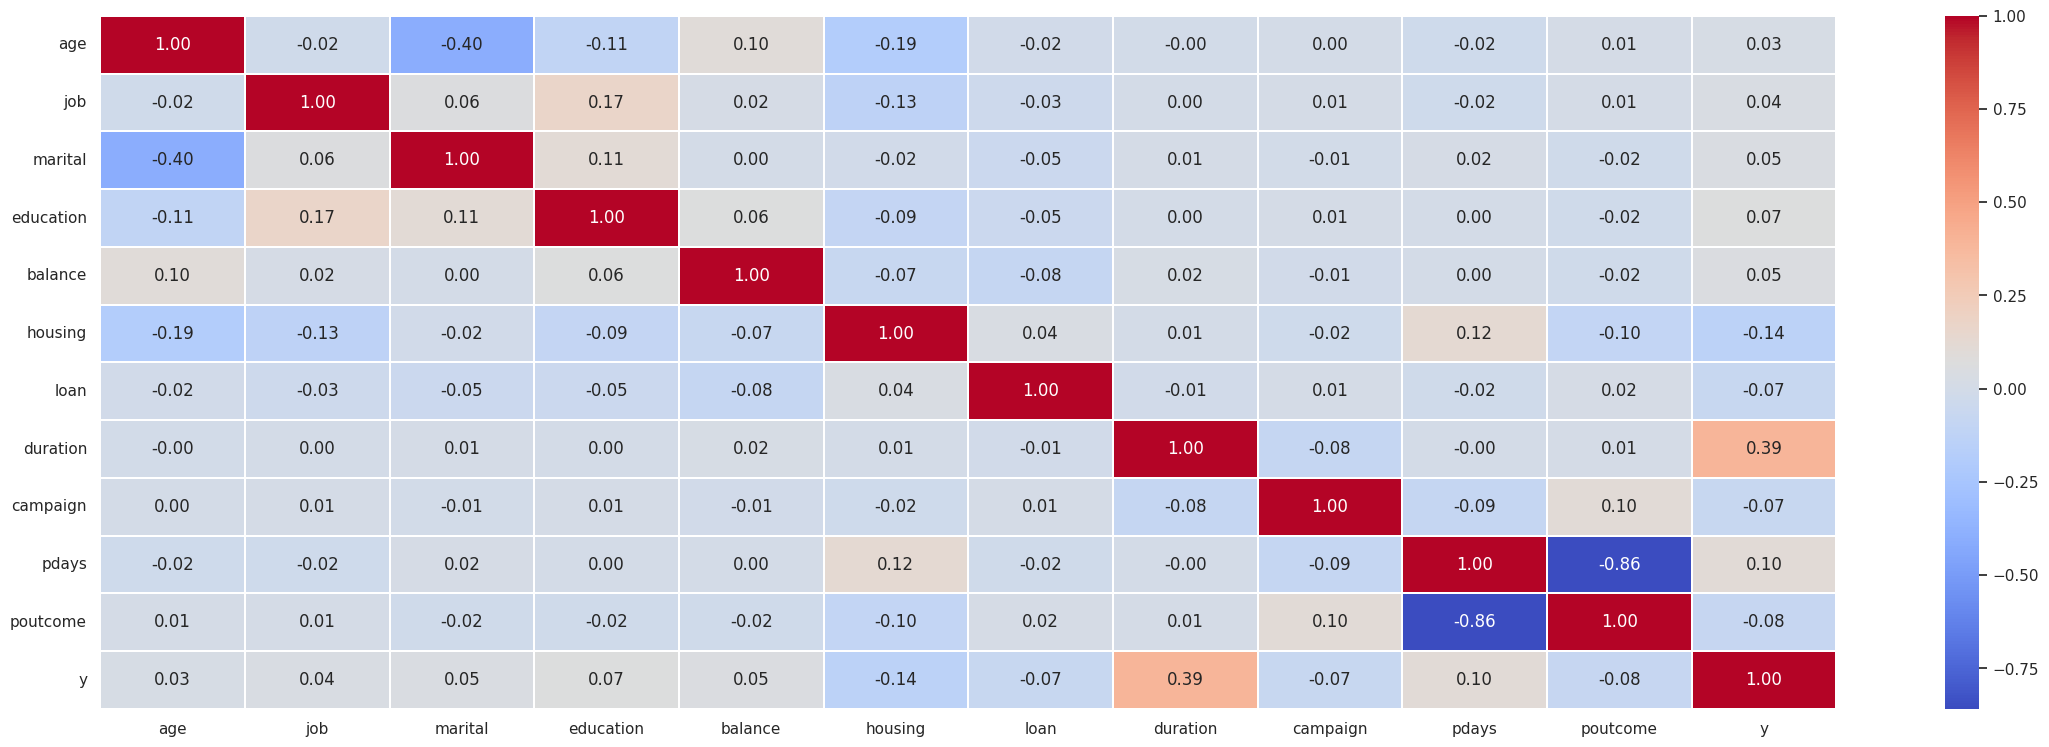

In [12]:
import seaborn as sns
import matplotlib.pyplot as  plt
matriz_correlacion = data.corr()
sns.set(style='white')
plt.figure(figsize=(28,9))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.2)

Al igual que con otros dataset que he utilizado últimamente, este a primera vista no tiene muy buenas correlaciones entre ellos.

# Coeficiente de silueta + KMeans

Con esto podremos saber el número óptimo de clusters en este conjuto de datos. Usaré kmeans para este ejercicio.

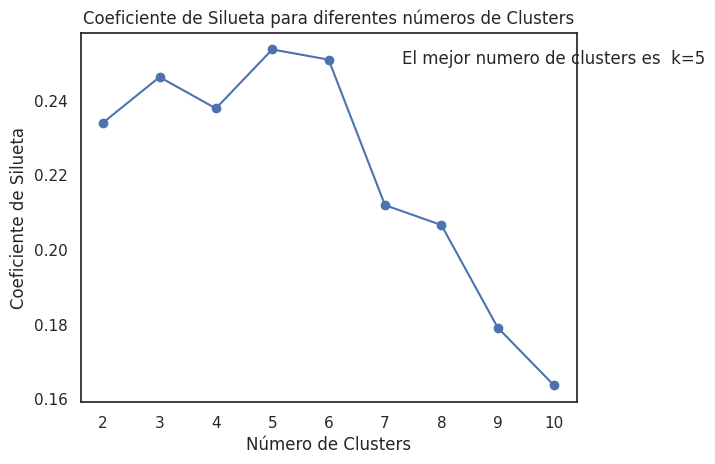

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Creamos una lista para almacenar los valores del coeficiente de silueta
silhouette_scores = []

# Rango de número de clusters que queremos probar
num_clusters_range = range(2, 11)

# Calculamos el coeficiente de silueta para cada número de clusters
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters,init="k-means++",n_init='auto',random_state=100)
    kmeans.fit(X)
    score_sil=silhouette_score(X,kmeans.labels_)
    silhouette_scores.append(score_sil)
# Graficamos los resultados
max_score_index = silhouette_scores.index(max(silhouette_scores))
max_score = silhouette_scores[max_score_index]

plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes números de Clusters')
# Agregar una etiqueta de texto en la esquina superior derecha del gráfico
plt.text(10, max_score, f'El mejor numero de clusters es  k={max_score_index+2}', ha='center', va='top')
plt.show()

Antes creía que con dos clusters podría bastar, pero al escalar los datos me dio un resultado muy diferente. Cuando no había escalado mis datos el número de clusters máximo que me daba era 2, y luego iba bajando, pero en este caso me dice que el mejor sería 5. Por lo que viendo este nuevo resultado, elegiré 5 clusters. Aunque 4 parece también una buena opción. Y bueno, es por ello que elegí los 5 clusters, debido a que me daba el mayor valor de puntuación.

En esta parte tuve un error tonto que al no poner **random_state** no paraba de darme resultados diferentes por cada interacción, pero una vez me di cuenta se arregló este problema.

# Dendograma

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(
<ipython-input-14-d133036670de>:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(D, method='complete')


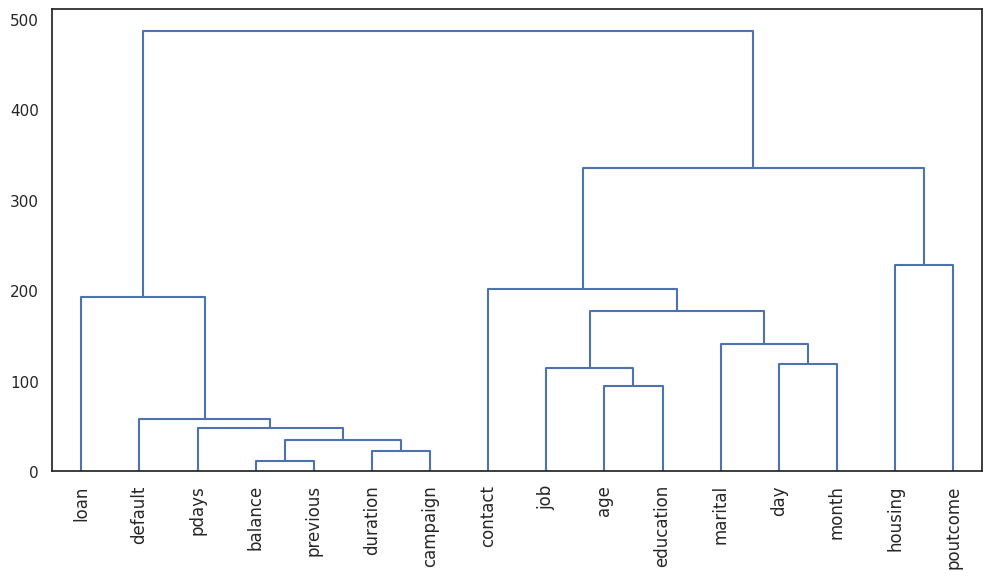

In [14]:
import sklearn.neighbors
from scipy import cluster

#Aquí las columnas ahora son filas, esto hace que la tarea
#del dendrograma sea más fácil.
Xt = X.T
#Calcular matriz de distancias
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
D = dist.pairwise(Xt)
#Promedio de las distancias
avD = np.average(D)

#Constuimos el dendograma
plt.figure(figsize=(12, 6))
threshold_2 = 7
# Seleccionamos como distancia intercluster el vecino más alejado (complete)
clusters = cluster.hierarchy.linkage(D, method='complete')
cluster.hierarchy.dendrogram(clusters, color_threshold=threshold_2, labels=X.columns.to_list(), leaf_rotation=90)
plt.show()

In [15]:
#No me deja ejecutarlo falta de RAM
# import scipy.cluster.hierarchy as sch
# dendogram=sch.dendrogram(sch.linkage(X,method="ward"))
# plt.show()

Ahora el dendrograma tiene mejor forma, antes de escalar se veía algo raro y básicamente no se podía interpretar demasiado. Ahora se pueden notar más las relaciones de las características así como los posibles conjuntos de clusteres. Y como vimos en la matriz, en general no es que tengan mucha similitud entre los diferentes grupos que podemos ver. Hay características las cuales se llevan muy bien como **balance** y **previous** y otros no tanto como **housing** y **poutcome**. A priori, si que creo que pueden llegar a ser 4-5 clusters como vimos en el gráfico anterior.

A priori me parece una cantidad coherente la que nos ha dado, entre 4-5. Haciendo varias pruebas me ha llegado a dar hasta 8, siendo para mi un número demasiado alto.

# PCA

Voy a usar por primera vez este método, el cual es útil por sino no comprendes muy bien el dataset o su problema. Con esto se puede ver la correclación entre las diferentes variables.

In [16]:
from sklearn.decomposition import PCA

#Reducimos la dimensionalidad a dos dimensiones.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#Mostramos el porcentaje de varianza
print(pca.explained_variance_ratio_)
#Con solo 2 componentes ya se pude explicar el 50% de toda la información

#Ver la importancia de cada variable con las nuevas dimensiones
pd.DataFrame(np.matrix.transpose(pca.components_), columns=["PC1","PC2"], index=X.columns)

[0.25747525 0.17955342]


,PC1,PC2
age,-0.025009,-0.036727
job,-0.116820,-0.016302
marital,-0.031305,0.033363
education,-0.080589,0.025826
default,0.002157,-0.007705
balance,-0.003700,-0.001268
housing,0.786700,0.530378
loan,0.041815,0.056258
contact,0.540660,-0.701207
day,-0.021784,-0.024367


Ahora vamos a visulizar el dataset, usando las dimensiones antes dictadas.

Ahora vamos a ver con cuantos componentes da un mejor resultado. Para ello vamos a ver el siguiente gráfico.

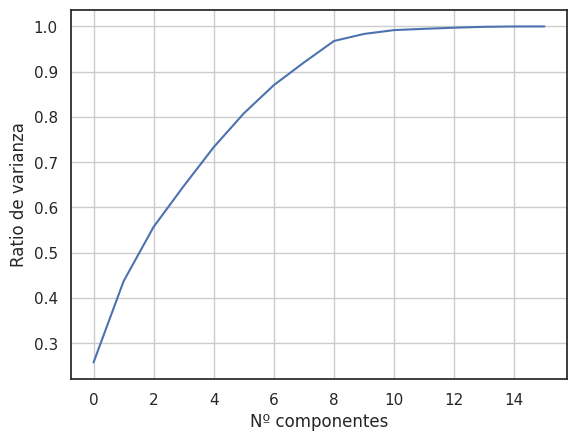

In [17]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Nº componentes")
plt.ylabel("Ratio de varianza")
#Añadir una cuadrícula
plt.grid(True)
plt.show()

Aquí se puede ver la mejor cantidad de números de componentes. En este caso voy a usar como número de componentes 12, debido a que muy cercano al valor máximo y tampoco creo que sea necesario coger muchos más.

# Creamos el modelo

In [42]:
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X)

#Creamos el modelo
modelo = KMeans(n_clusters=5,init="k-means++",n_init='auto' ,random_state=100)
modelo.fit(X_pca)
pred = modelo.predict(X_pca)

cluster = modelo.labels_
data["cluster"] = cluster
data

<ipython-input-42-a2096c6c2112>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cluster"] = cluster


,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y,cluster
0,0.610526,0.363636,0.5,0.666667,0.020984,1.0,0.0,0.053070,0.015873,-0.001148,1.000000,0.0,4
1,0.463158,0.818182,1.0,0.333333,0.000284,1.0,0.0,0.030704,0.015873,-0.001148,1.000000,0.0,4
2,0.347368,0.181818,0.5,0.333333,0.000020,1.0,1.0,0.015453,0.015873,-0.001148,1.000000,0.0,4
3,0.494737,0.090909,0.5,1.000000,0.014746,1.0,0.0,0.018707,0.015873,-0.001148,1.000000,0.0,4
4,0.347368,1.000000,1.0,1.000000,0.000010,0.0,0.0,0.040260,0.015873,-0.001148,1.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.536842,0.818182,0.5,0.666667,0.008078,0.0,0.0,0.198658,0.047619,-0.001148,1.000000,1.0,3
45207,0.747368,0.454545,0.0,0.000000,0.016930,0.0,0.0,0.092721,0.031746,-0.001148,1.000000,1.0,3
45208,0.757895,0.454545,0.5,0.333333,0.055960,0.0,0.0,0.229158,0.079365,0.211251,0.666667,1.0,3
45209,0.600000,0.090909,0.5,0.333333,0.006541,0.0,0.0,0.103294,0.063492,-0.001148,1.000000,0.0,1


In [35]:
data["cluster"].value_counts()

cluster
1    37967
0     7244
Name: count, dtype: int64

Ya hemos creado la columna de cluster, la cual asigna a cada fila en que cluster esta. Además podemos ver la cantidad de registros que hay por cada cluster existente.

# Visualizamos los datos

Ahora veremos los clusters en un gráfico.

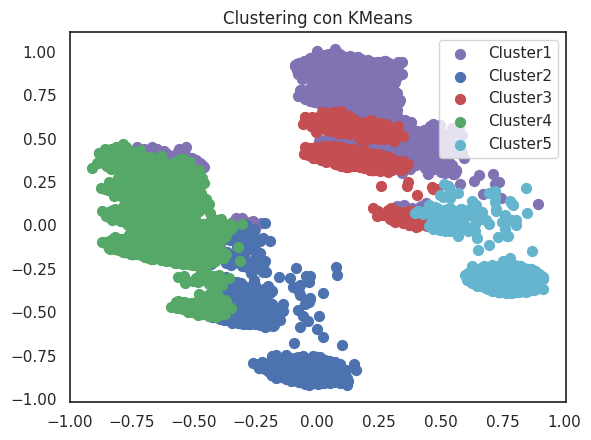

In [43]:
#Representamos los colores que vamos a usar
cores = ['m', 'b', 'r','g','c']

for cluster in range(len(cores)):
  plt.scatter(X_pca[pred == cluster ,0], X_pca[pred == cluster, 1], s=50, c=cores[cluster], label="Cluster" + str(cluster+1))

plt.title('Clustering con KMeans')
plt.legend()
plt.show()

Ya aquí podemos ver la separación de los diferentes clusteres, el único que no me convence mucho es el cluster 1, ya que parece que esta también debajo del cluster 4. Por lo demás, creo que esta bien.Se puede apreciar correctamente la separación de cada uno de ellos y se pueden visualizar correctamente.

En este caso he de decir, que tuve que modificar un par de veces los datos ya que me daban resultados raros a la hora de visualizarlos. Al principio había usado 8 componentes, pero luego de ir probando me quedé con 12 debido a que me dio simplemente un resultado más óptimo a mi criterio.

# Exportar los datos



In [44]:
# data_excel = data
# data_excel.to_excel('data_excel.xlsx', index=False)

Exportamos el dataset con la columna de cluster, en donde por cada fila tiene uno asociado. Esto lo usaremos ahora para hacer una prueba en power BI.